In [139]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [140]:
# Load Data Viz Pkgs
import seaborn as sns

In [141]:
import warnings
warnings.filterwarnings("ignore")

In [142]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [143]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [166]:

# Load Dataset
df = pd.read_csv("emotion_dataset_raw.csv")

In [167]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [168]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

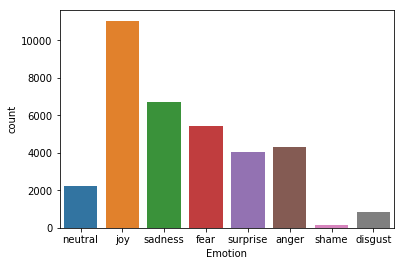

In [169]:
# Plot
sns.countplot(x='Emotion',data=df)

In [170]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [171]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [172]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [173]:
df['Clean_Text'] = df['Clean_Text'].apply(remove_punctuations)

In [174]:
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eye and brilliant Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako...


In [175]:
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: x.lower())
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funerals...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eye and brilliant regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako...


In [177]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [178]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [179]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [180]:

# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [181]:

# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                             

In [183]:

# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6250239509484575

In [184]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [185]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [186]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifie.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()